# Gold Coast wave monitoring 

Measured and derived wave parameters from data collected by a wave monitoring buoy anchored at the Gold Coast.
For more information please refer to www.qld.gov.au/waves.

The dataset is available from the [Gold Coast wave monitoring](https://www.qld.gov.au/environment/coasts-waterways/beach/monitoring/waves-sites/gold-coast) website. On this page you will find at the bottom right a `Download data` button, which provides a link to a series of dataset.


```{figure} ../_static/qldgov.png
---
figclass: margin
name: margin_figure21
---
```

:::{admonition} Field names:
:class: toggle, hint, toggle-shown

+ `Hs` - Significant wave height, an average of the highest third of the waves in a record (26.6 minute recording period).
+ `Hmax` - The maximum wave height in the record.
+ `Tz` - The zero upcrossing wave period.
+ `Tp` - The peak energy wave period.
+ `Peak Direction` - Direction (related to true north) from which the peak period waves are coming from.
+ `SST` - Approximation of sea surface temperature.

:::


In [40]:
%matplotlib inline
import io
import requests
from pylab import *
import netCDF4
import datetime as dt
import numpy as np
import pandas as pd
import matplotlib.dates as mdates

from pylab import rcParams
import warnings
warnings.filterwarnings('ignore')
%config InlineBackend.figure_format = 'svg'

## Getting the dataset 

From the website you can either download a `CSV` containing the data or directly get it from the provided `url`.

In [24]:
# Get the URL link
url = "https://www.data.qld.gov.au/dataset/d656d418-31b1-41fe-aae2-3d8a12588711/resource/73b4e42a-f3e7-4632-8b8e-d52205899048/download/gold-coast_2020-01-01t00_00-2020-12-31t23_30.csv"

# Open it with Pandas Library
s = requests.get(url).content
data_df = pd.read_csv(io.StringIO(s.decode('utf-8')))

We can visualise what is in the dataset by doing:

In [25]:
data_df

,Date/Time,Hs,Hmax,Tz,Tp,Peak Direction,SST
0,2020-01-01 00:00:00,1.490,2.48,7.339,12.174,78.08,25.35
1,2020-01-01 00:30:00,1.515,2.56,7.106,13.074,79.08,25.40
2,2020-01-01 01:00:00,1.533,2.42,7.274,13.406,79.08,25.35
3,2020-01-01 01:30:00,1.501,2.59,6.888,12.242,81.08,25.35
4,2020-01-01 02:00:00,1.499,2.72,7.255,12.920,84.08,25.35
...,...,...,...,...,...,...,...
17563,2020-12-31 21:30:00,1.295,2.21,4.809,6.192,103.24,23.90
17564,2020-12-31 22:00:00,1.190,1.85,4.705,6.826,106.24,23.90
17565,2020-12-31 22:30:00,1.144,1.89,4.867,5.997,115.24,23.90
17566,2020-12-31 23:00:00,1.215,2.22,5.119,6.973,82.24,23.95


First let's define the `Date/Time` format:

In [26]:
dates = pd.to_datetime(data_df['Date/Time'], format = '%Y-%m-%d %H:%M:%S')

## Plotting it

We can now plot the data, for example we will plot the significant wave height `Hs` over time:

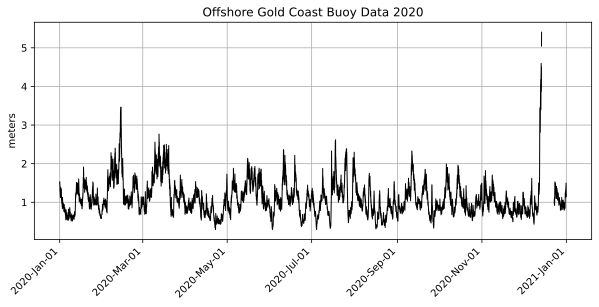

In [50]:
# Figure dimension
fig = plt.figure(figsize=(10,4)) 
ax = fig.add_subplot(111)

# Hs over time is specified here
ax.plot(dates,data_df['Hs'], c='k', linewidth=1) 

# Decorators for the plot
locator = mdates.AutoDateLocator()
ax.grid(True)
setp(gca().get_xticklabels(), rotation=45, horizontalalignment='right')

# Axis labels 
plt.title('Offshore Gold Coast Buoy Data 2020')
ax.xaxis.set_major_locator(locator)
ax.xaxis.set_major_formatter(DateFormatter('%Y-%b-%d'))
ax.set_ylabel('meters')

fig.show()

It seems that there are some weird data on this graph... obviously we don't expect to get negative values for `Hs`...

## Dealing with nodata

Let's find out these values:

In [34]:
data_df['Hs'].min()

-99.9

Ok, so we have no data values which are specified as -99.9. 

Instead of giving them a default values we will define them as `NaN` directly.

In [36]:
# We could use that data_df = data_df.replace(-99.9,np.NaN) or the following
data_df['Hs'] = data_df['Hs'].replace(data_df['Hs'].min(),np.NaN)

Let's plot the dataset now...

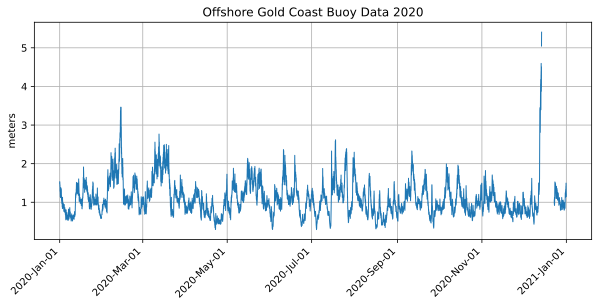

In [48]:
# Figure dimension
fig = plt.figure(figsize=(10,4)) 
ax = fig.add_subplot(111)

# Hs over time is specified here
ax.plot(dates,data_df['Hs'], linewidth=1) 

# Decorators for the plot
locator = mdates.AutoDateLocator()
ax.grid(True)
setp(gca().get_xticklabels(), rotation=45, horizontalalignment='right')

# Axis labels 
plt.title('Offshore Gold Coast Buoy Data 2020')
ax.xaxis.set_major_locator(locator)
ax.xaxis.set_major_formatter(DateFormatter('%Y-%b-%d'))
ax.set_ylabel('meters')

fig.show()

Look's better now! You can try to plot one of the other parameters:

+ `Hmax` - The maximum wave height in the record.
+ `Tz` - The zero upcrossing wave period.
+ `Tp` - The peak energy wave period.
+ `SST` - Approximation of sea surface temperature.